In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

# 1 Признаки по одному
### 1.1 Количественные

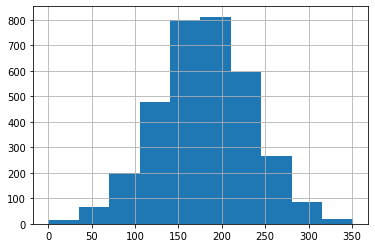

In [8]:
df['Total day minutes'].hist();

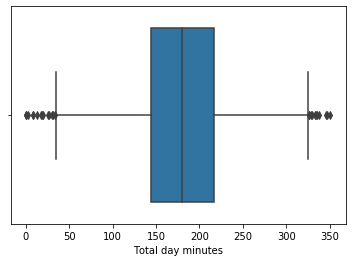

In [10]:
sns.boxplot(df['Total day minutes']);

### 1.2 Категориальные

In [13]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [14]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

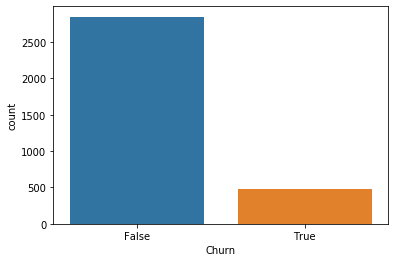

In [15]:
sns.countplot(df['Churn']);

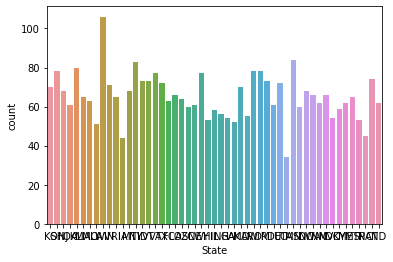

In [16]:
sns.countplot(df['State']);

In [20]:
# Проверка на вхождение и построение графика
df[df['State'].isin(df['State'].value_counts().head().index)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,False
58,WI,68,415,No,No,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3306,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3310,NY,94,415,No,No,0,190.4,91,32.37,92.0,107,7.82,224.8,108,10.12,13.6,17,3.67,2,False
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


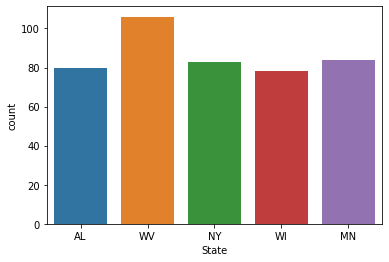

In [22]:
# Здесь мы создаем Series содержащий 5 самых часто встречающихся штатов
# После чего все остальные штаты проверяем на вхождение в эту серию
sns.countplot(df[df['State'].isin(df['State'].value_counts().head().index)]['State']);

# Взаимодействие признаков
## 2.1 Количественные с количественными

In [28]:
# Для примера отберем несколько признаков и постороим для нихгистограмму
feat = [f for f in df.columns if 'charge' in f]
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

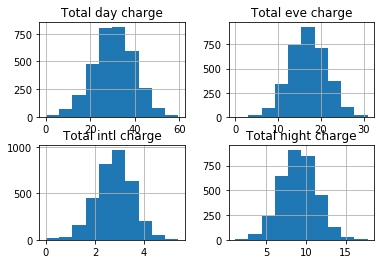

In [30]:
df[feat].hist();

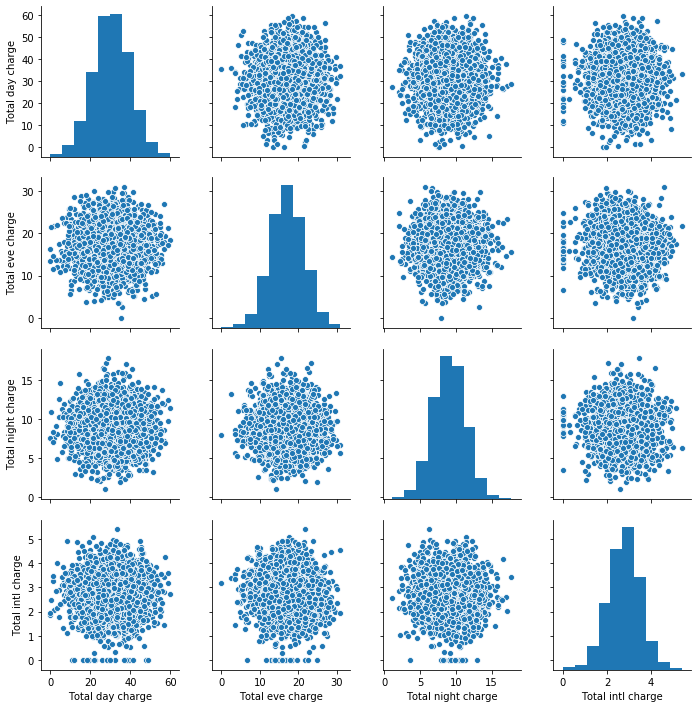

In [31]:
sns.pairplot(df[feat]);

In [40]:
df['Churn'].map({False:'blue',True:'orange'})

0       blue
1       blue
2       blue
3       blue
4       blue
        ... 
3328    blue
3329    blue
3330    blue
3331    blue
3332    blue
Name: Churn, Length: 3333, dtype: object

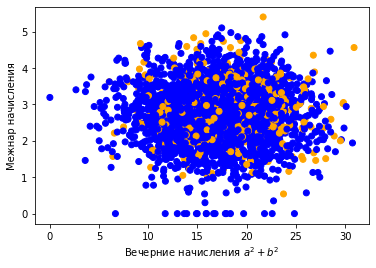

In [41]:
# Диаграмма рассеивания 
# Первый аргумент будет по оси х, второй по оси у
# Можно раскрашивать в разные цвета
#  В данном случае в зависимости от значения Churn точка имеет разный цвет
plt.scatter(df['Total eve charge'],df['Total intl charge'],
            color=df['Churn'].map({False:'blue',True:'orange'}),
           label = );
# Надписи на осях. Можно использовать LAtex 
plt.xlabel(r'Вечерние начисления $a^2+b^2$');
plt.ylabel('Межнар начисления');

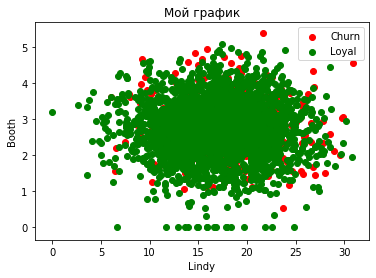

In [52]:
# Использование label(то есть подписей на диаграмме что значит тот или иной цвет)
# Для этого можно использовать фильтрацию по булевой маске
# Так как этот признак у нас булевый мы может 
#просто использовать его как фильтр df['Churn']
df[df['Churn']]
# Вот мы отобрали все записи где Churn =true
df[~df['Churn']]
# А вот мы отобрали все записи где Churn=false
# Теперь используем эту маску
plt.scatter(df[df['Churn']]['Total eve charge'],df[df['Churn']]['Total intl charge'],
           color='red',label='Churn');
plt.scatter(df[~df['Churn']]['Total eve charge'],df[~df['Churn']]['Total intl charge'],
           color='green',label='Loyal');
plt.xlabel('Lindy')
plt.ylabel('Booth')
plt.title('Мой график')
plt.legend();
# По всей видимости если в одной ячейке 2 диаграммы то они накладываются друг на друга

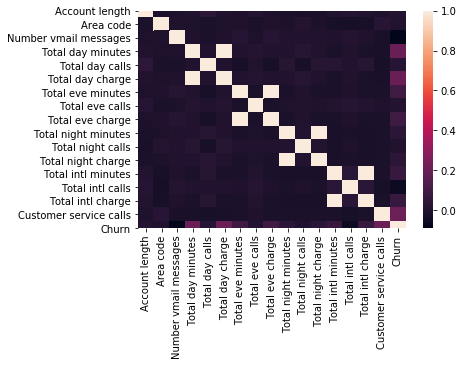

In [54]:
# Корреляция и ее графики
# Корреляция, по умолчанию для количественных признаков(Критерий корреляции Пирсона)
df.corr()
# Построение диаграммы
sns.heatmap(df.corr());
